In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('housing.csv' , sep='\s+')

In [3]:
df.shape

(505, 14)

In [4]:
df.columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [5]:
df.columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','price']
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


Linear relationships between the variables is found out using the correlation 
pearson : standard correlation coefficient

In [6]:
df.corr('pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
crim,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
zn,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
indus,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
chas,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
nox,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
rm,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
age,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
dis,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
rad,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
tax,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


If the value is close to 1, it means that there is a strong positive correlation between the two variables which can be seen here in the case of 'rm'

In [7]:
# initializing our inputs and outputs
X = df['price'].values
Y = df[['rm']].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

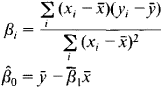

y=mx+b
<br>y_delta = b0 + b1.x

In [8]:
# using the formula to calculate the b1 and b0
p=0;q=0
for i in range(len(X)):
    p += (X[i] - x_mean) * (Y[i] - y_mean)
    q += np.square((X[i] - x_mean))
b1 = p/q
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

[0.05311504] [5.08738275]


Now we have our bias coefficient(b) and scale factor(m)

Our linear equation would be 
<br>5.087+0.0531x

In [9]:
#Performing linear regression using scikit-learn
from sklearn import linear_model

model = linear_model.LinearRegression(normalize= True)

#The model.fit() function fits a linear model
model.fit(df[["price"]], df["rm"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [0.05311504]
Model intercept: 5.087382746014164


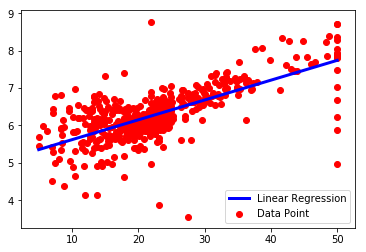

In [16]:
x = np.linspace(np.min(X),np.max(X) , 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='blue',linewidth=3, label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='red', label='Data Point')
plt.legend()
plt.show()